# Introduction to Scikit-learn
In these exercises we will load in models for fitting and predicting. The intention is that you should get comfortable using `sklearn` and the interface that it offers.

When using a model it is important to always initialize it first. This is done by calling the model with a set of parentheses at the end. Otherwise it will not work. Here is an example:
```python
from sklearn.tree import DecisionTreeClassifier

# Initialize
model = DecisionTreeClassifier()
```

Remember the main methods we use on `sklearn` objects are the following:
- `fit` Calibrate the model to a dataset. Learn input/output relationship.
- `predict` Predict on a new dataset. A boolean for classification and a continuous number for regression. Use input/output relationship.
- `predict_proba` Predict a probability of belonging to a class. Only classification.

Examples:
```python
# Fit model with training data
model.fit(X = X_train, y = y_train)

# Predict with fitted model
model.predict(X = X_test)
```

## Decision trees
In this exercise you will be using a decision tree for classification as shown in the slides. Load in the iris dataset, which is now split into two files called `iris_train.csv` and `iris_test.csv`. Load them in as `iris_train` and `iris_test` respectively.

In [1]:
#ANS
import pandas as pd
iris_train = pd.read_csv('iris_train.csv')
iris_test = pd.read_csv('iris_test.csv')

Now import the `DecisionTreeClassifier` model from `sklearn.tree` and fit it on `iris_train` using the columns `Sepal.Length` and `Sepal.Width` as features and the `Species` column as the label. 

Afterwards, predict on `iris_test` and save the predictions to a variable.

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2)
feats=["Sepal.Length", "Sepal.Width"]
#feats=["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]
tree.fit(X = iris_train[feats], y = iris_train['Species'])
predict = tree.predict(X = iris_test[feats])
print(predict)
print(iris_test['Species'])
print(tree)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica'
 'virginica']
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20    versicolor
21    versicolor
22    versicolor
23    versicolor
24    versicolor
25  

In [5]:
#ANS
from sklearn.tree import DecisionTreeClassifier 

# Initialize model
clf = DecisionTreeClassifier()

# Select features
iris_feat = ["Sepal.Length", "Sepal.Width"]

# Fit model
clf.fit(X = iris_train[iris_feat], y = iris_train['Species'])

# Predict on test data (Make sure to pass columns in the same order)
test_pred = clf.predict(X = iris_test[iris_feat])

Calculate the accuracy by comparing the predictions on `iris_test` with the labels. Hint: When calculating the accuracy you can make use of a vectorized comparison operation like so:
```python
vecA == vecB
```
This will give a boolean vector. When doing operations on a boolean vector `True` entries are treated as 1, and `False` are treated as 0. 

In [61]:
correct=(predict == iris_test['Species'])
print(correct)
sumcorrect=correct.sum()
print(sumcorrect)
totaltested = iris_test.shape[0]
print(totaltested)
print(sumcorrect / totaltested)

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17    False
18     True
19     True
20    False
21    False
22     True
23    False
24     True
25     True
26     True
27    False
28    False
29    False
30     True
31     True
32     True
33     True
34     True
35     True
36    False
37     True
38     True
39    False
40    False
41     True
42     True
43     True
44     True
45     True
46     True
47    False
48     True
49     True
Name: Species, dtype: bool
38
50
0.76


In [ ]:
#ANS

# Calculate the number of correct predictions
cor_pred = (test_pred == iris_test['Species']).sum()

# Calculate accuracy by dividing with total number of obeservations
cor_pred / iris_test.shape[0]

Make a plot of the iris dataset where you show `Sepal.Length` on the x axis and `Sepal.Width` on the y axis and color the points according to their species (hue). Which species do you think the model has issues predicting? 

HINT: Try to use `sns.scatterplot`.

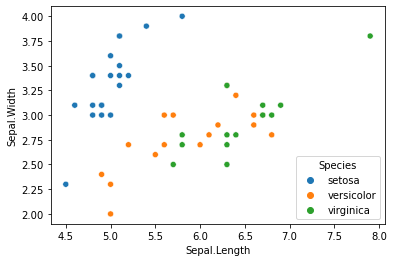

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.scatterplot(x = "Sepal.Length", y = "Sepal.Width", hue =  'Species', data = iris_test)
plt.show()

In [ ]:
#ANS
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
sns.scatterplot(x = "Sepal.Length", y = "Sepal.Width", hue =  'Species', data = iris_test)
plt.show()

Let us try to plot the decision boundary made by our model. You can import the function `plot_decision_boundary` from the library `help_func`. Use Shift+Tab after importing the function, in order to read the documentation for how to use it.
After plotting it, go back to where you trained the decision tree, and try to set `max_depth=2` in the `DecisionTreeClassifier`, how does that affect the decision boundary?

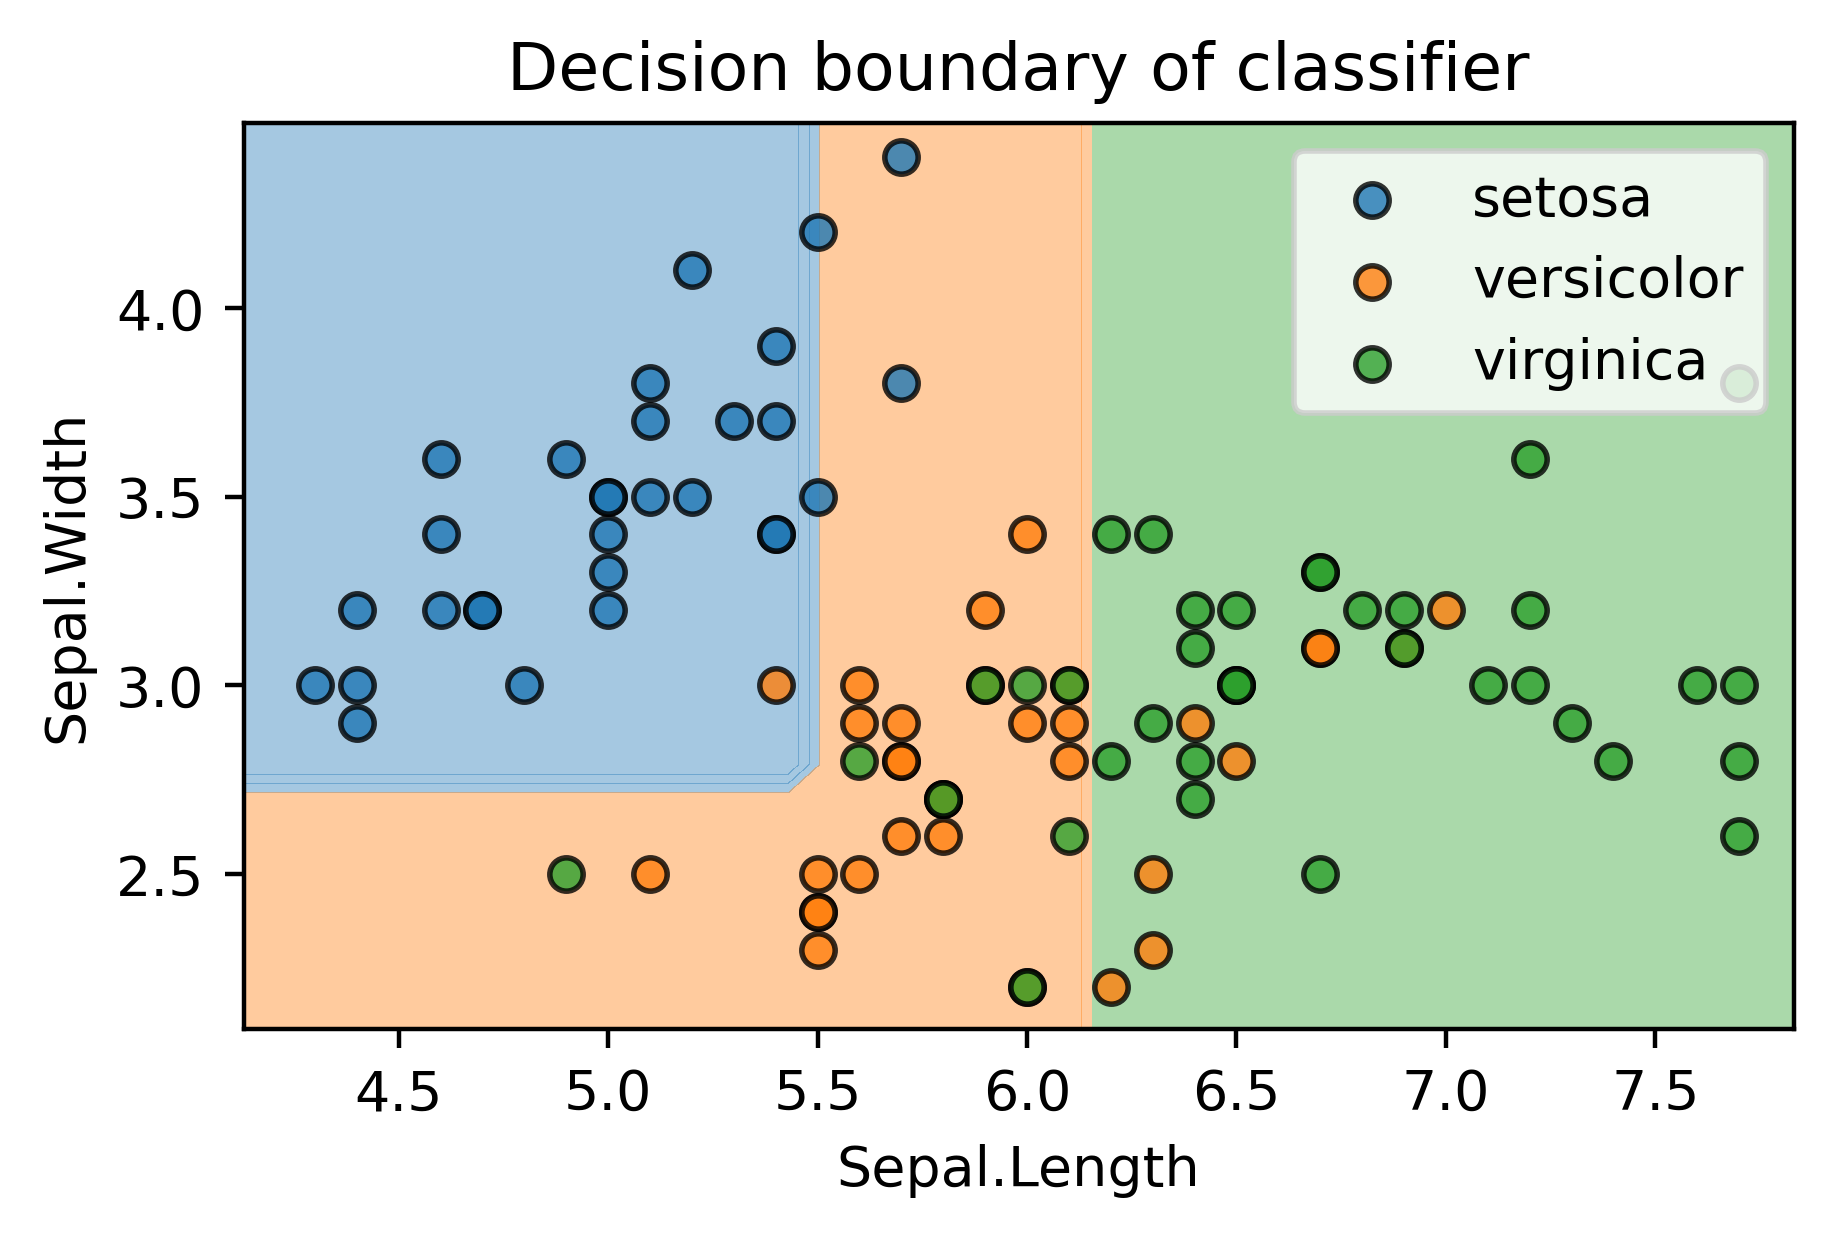

In [62]:
from help_func import plot_decision_boundary
plot_decision_boundary(tree, iris_train, ["Sepal.Length", "Sepal.Width"], 'Species')

In [ ]:
#ANS
from help_func import plot_decision_boundary
plot_decision_boundary(clf, iris_train, ["Sepal.Length", "Sepal.Width"], 'Species')

Let us also try to plot the tree itself, to see what the tree-structure looks like. You can do this by importing `plot_tree` from `sklearn.tree`. The first argument to the function `plot_tree` should be the trained model object. You should also pass the argument `feature_names` and set it equal to a list containing the names of the features used to train the model. 

Before plotting make a figure using `matplotlib` with `dpi=200`, in order to ensure proper resolution.  

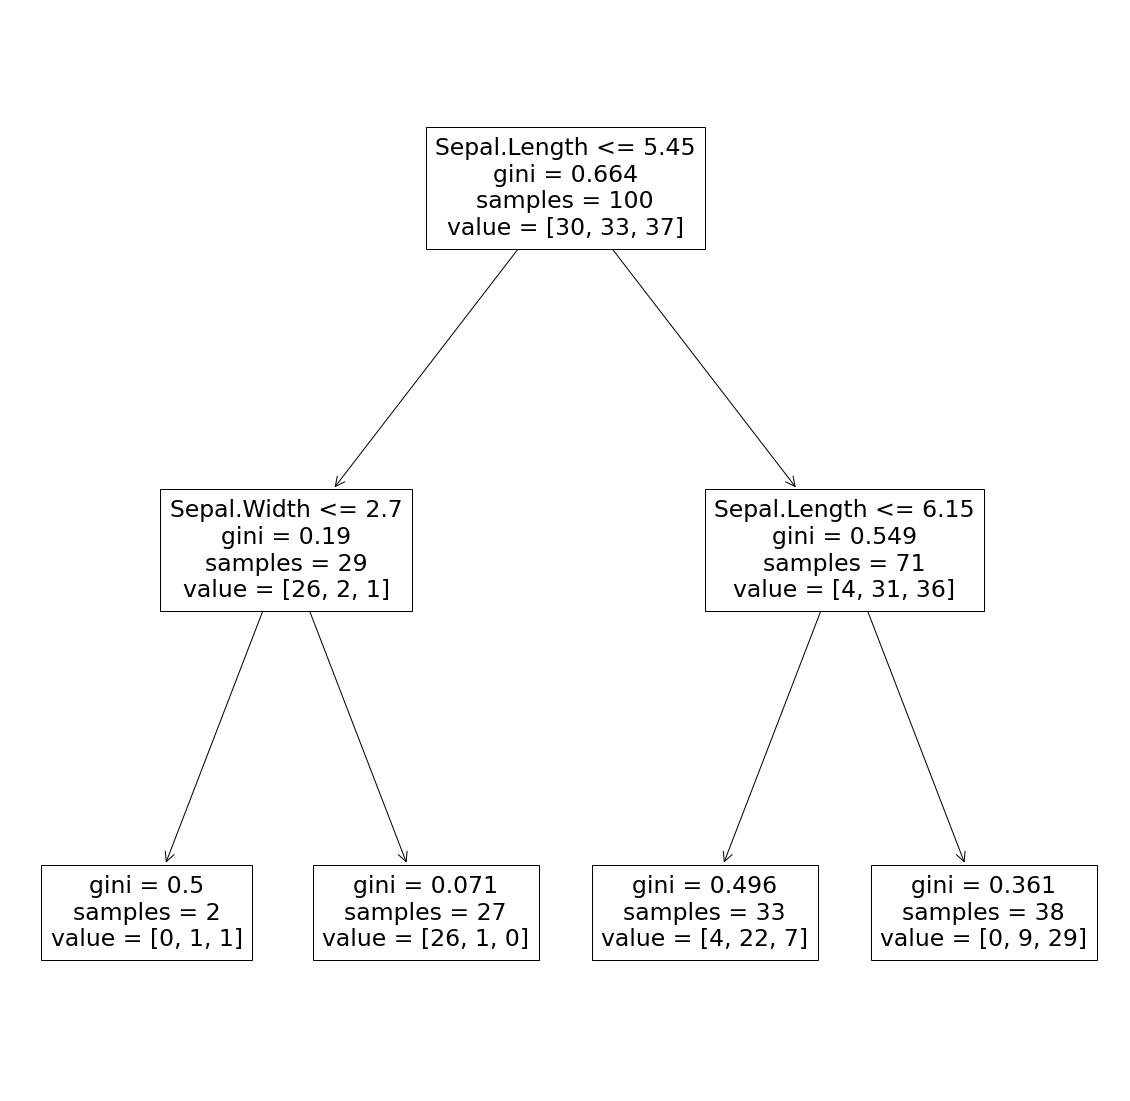

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize = [20, 20])
out = plot_tree(tree, feature_names = ["Sepal.Length", "Sepal.Width"])

In [ ]:
#ANS
from sklearn.tree import plot_tree
plt.figure(dpi=200)
out = plot_tree(clf, feature_names = ["Sepal.Length", "Sepal.Width"], filled=True)

##### Try running the above exercises once again where you also use the `Petal` features. Notice any changes in accuracy?

# Regression
Now we will try a regression exercise by using the `auto_mpg_train.csv` and `auto_mpg_test.csv` datasets. The datasets contain information on different cars and the target variable is the associated miles pr. gallon `mpg`.

In [ ]:
df_train = pd.read_csv('auto_mpg_train.csv', index_col = 0)
df_test = pd.read_csv('auto_mpg_test.csv', index_col = 0)

Fit a regression tree to the dataset, and try to predict in the test set. Use only `horsepower` as input feature. The model should be a `DecisionTreeRegressor` from `sklearn.tree`

In [ ]:
#ANS
from sklearn.tree import DecisionTreeRegressor

# Initialize model
tree = DecisionTreeRegressor()

# Set features
feat = ['horsepower']

# Fit on training data
tree.fit(X = df_train[feat], y = df_train['mpg'])

# Predict on test data
pred = tree.predict(X = df_test[feat])

Calculate the error as the mean square error:

$$ L(y,\hat{y}) = \frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2  $$

Where $ y $ is the vector of target values and $ \hat{y} $ is the vector of predictions. $ L: \mathbb{R}^N \times \mathbb{R}^N  \to \mathbb{R}$

In [ ]:
#ANS
# Calculate loss
((df_test['mpg'] - pred)**2).mean()

Create a scatter using `plt.scatter` to plot the `mpg` as a function of `horsepower` and plot the predictions as a function of `horsepower`.

Hint: Use the `label` argument in `plt.scatter` together with the `plt.legend` function to create a legend.

In [ ]:
#ANS

# Create large figure
plt.figure(dpi=200)

# Plot labels against horsepower
plt.scatter(df_test['horsepower'], df_test['mpg'], label="mpg")

# Plot predictions against horsepower
plt.scatter(df_test['horsepower'], pred, label="pred")

# Add legend
plt.legend()

# Show plot
plt.show()

Try doing the above exercise with different features as `X`, see which one gives you the best performance.

The above plot gives us a sense of what the tree looks like. In order to see it more clearly, import the `plot_regression_tree` function from `help_func`. It takes a trained classifier, a dataframe, the name of the feature and the name of the target.
Try to plot it for the test data.

In [ ]:
#ANS
from help_func import plot_regression_tree
plot_regression_tree(tree, df_test, 'horsepower', 'mpg')

# Bonus exercises


## Exercise 1
This is a continuation of the classification plotting exercise. Try to plot the iris test set again where you color correct and wrong predictions in different colors. 

Hint: use vectorized comparison and add the resulting vector to the dataframe. Plot using `scatterplot`.

In [ ]:
#ANS

# Figure out which observations are predicted correctly
cor_pred_vec = test_pred == iris_test['Species']

# Add to the dataframe in order to plot it
iris_test['correct_pred'] = cor_pred_vec

# Plot
sns.scatterplot(x = "Sepal.Length", y = "Sepal.Width", hue =  'correct_pred', data = iris_test)
plt.show()

# Another plot example
plt.figure(dpi=200)
plt.scatter(iris_test.loc[cor_pred_vec, "Sepal.Length"], iris_test.loc[cor_pred_vec,"Sepal.Width"])
plt.scatter(iris_test.loc[~cor_pred_vec, "Sepal.Length"], iris_test.loc[~cor_pred_vec,"Sepal.Width"])
plt.show()

## Exercise 2
You might be familiar with a logistic regression. Try to import the class `LogisticRegression` from `sklearn.linear_model` and use it on the `iris` dataset from the previous classification exercise. Convert the `Species` variable to numeric values using the `LabelEncoder` from `sklearn.preprocessing` (see http://scikit-learn.org/stable/modules/preprocessing_targets.html). When predicting use the `predict_proba` method and convert back to a classification using the `np.argmax` function.

Use all features, and compare with the score from the first exercise when also using all features. Afterwards, try to enable `L1` regularization and see if you can improve the score.

In [ ]:
#ANS
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize model
lr = LogisticRegression()

# Use all features
lr_feat = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Initialize labelencoder
le = LabelEncoder()

# Fit labelencoder
le.fit(iris_train['Species'])

# Show identified unique values
print("Unique species values: {}".format(le.classes_))

# Encode train
iris_train['Species'] = le.transform(iris_train['Species'])

# Encode test
iris_test['Species'] = le.transform(iris_test['Species'])

# Fit the model on the iris data
lr.fit(X = iris_train[lr_feat], y = iris_train['Species'])

# Predict on the test set
pred = lr.predict_proba(iris_test[lr_feat])

# Find the class with the highest probability
pred_hard = np.argmax(pred, axis = 1)

# Accuracy function
accuracy = lambda y_label, y_hat: np.sum(y_label == y_hat)/y_label.shape[0]

# Calculate accuracy 
print(accuracy(iris_test['Species'], pred_hard))

In [ ]:
#CONFIG
# Hide code tagged with #ANS
from IPython.display import HTML
HTML('''<script>
function code_hide() {
    var cells = IPython.notebook.get_cells()
    cells.forEach(function(x){ if(x.get_text().includes("#ANS")){
        if (x.get_text().includes("#CONFIG")){

        } else{
            x.input.hide()
            x.output_area.clear_output()
        }

        
    }
    })
}
function code_hide2() {
    var cells = IPython.notebook.get_cells();
    cells.forEach(function(x){
    if( x.cell_type != "markdown"){
        x.input.show()      
    }
    
        });
} 
$( document ).ready(code_hide);
$( document ).ready(code_hide2);
</script>
<form action="javascript:code_hide()"><input type="submit" value="Hide answers"></form>
<form action="javascript:code_hide2()"><input type="submit" value="Show answers"></form>''')